# Load required modules

In [1]:
from gfunc.dev import devel as gdev

from spartan.utils import cufflinks
from spartan.utils import spandas as spd
from spartan.utils.externals import mkdirp

import numpy as np
import pandas as pd
from matplotlib import  pylab as plt

# Figure settings

In [2]:
cluster_name = 'upAfter4'
cluster_id = 4

In [3]:
a = 2
rcParams['figure.figsize'] = 8*a, 6*a

rcParams['font.size'] = 30

In [4]:
save_figs = True
save_dir = '/home/gus/Dropbox/repos/git/uci-thesis-latex/figures/figs/ecr_and_insects_ptci_20130918_orthodb7/%s_gene_profiles_from_cummerbund' % (cluster_name)

mkdirp(save_dir)

In [5]:
def save_figure(save_as):
    if save_figs:
        out_path = '%s/%s' % (save_dir.rstrip('/'),save_as)
        print 'saving figure as: %s' % (out_path)
        savefig(out_path)

# Load an instance of the ortholog graph to facilitate comparisons

In [6]:
ortho_graph = gdev.load_graph('/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/basic_ortho_graph.gpkl')
node_dict= ortho_graph.node['maps']['nodes']
edge_dict= ortho_graph.node['maps']['edges']

# Load FPKM data retrieved from cummeRbund

In [7]:
Aa_file = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/RNAseq_results/bio/dunnw/data/4mosqs_mg_RNAseq/gtf_strict/gene_fpkm_dumps/Aa.fpkm'
Ag_file = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/RNAseq_results/bio/dunnw/data/4mosqs_mg_RNAseq/gtf_strict/gene_fpkm_dumps/Ag.fpkm'
Cq_file = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/RNAseq_results/bio/dunnw/data/4mosqs_mg_RNAseq/gtf_strict/gene_fpkm_dumps/Cq.fpkm'

In [8]:
AaFPKMs = pd.read_table(Aa_file, sep=' ', header=0, index_col=0)
AgFPKMs = pd.read_table(Ag_file, sep=' ', header=0, index_col=0)
CqFPKMs = pd.read_table(Cq_file, sep=' ', header=0, index_col=0)

# Load name mappings from Cufflinks generated IDs to Vectorbase Accession IDs

In [9]:
AaGTF = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/RNAseq_results/bio/dunnw/data/4mosqs_mg_RNAseq/gtf_strict/cuffmerge_Aa_00_0.Aa_04_0.Aa_06_0.Aa_08_0.Aa_10_0/merged.gtf'
AgGTF = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/RNAseq_results/bio/dunnw/data/4mosqs_mg_RNAseq/gtf_strict/cuffmerge_Ag_00_0.Ag_04_0.Ag_06_0.Ag_08_0.Ag_10_0/merged.gtf'
CqGTF = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/RNAseq_results/bio/dunnw/data/4mosqs_mg_RNAseq/gtf_strict/cuffmerge_Cq_00_0.Cq_04_0.Cq_06_0.Cq_08_0.Cq_10_0/merged.gtf'

In [10]:
Aa_xloc2vb = cufflinks.get_XLOC_to_nearest_ref_map(AaGTF)
Ag_xloc2vb = cufflinks.get_XLOC_to_nearest_ref_map(AgGTF)
Cq_xloc2vb = cufflinks.get_XLOC_to_nearest_ref_map(CqGTF)

# Load ortholog names

In [11]:
Aa_orthos = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/ecr_OR_insect_meanPTCI_thresh_1_gene_names.AAEL.txt'
Ag_orthos = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/ecr_OR_insect_meanPTCI_thresh_1_gene_names.AGAP.txt'
Cq_orthos = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/ecr_OR_insect_meanPTCI_thresh_1_gene_names.CPIJ.txt'

In [12]:
Aa_orthos = [x.rstrip('\n') for x in open(Aa_orthos,'rU')]
Ag_orthos = [x.rstrip('\n') for x in open(Ag_orthos,'rU')]
Cq_orthos = [x.rstrip('\n') for x in open(Cq_orthos,'rU')]

# Load promoter fastas

In [13]:
fasta_list_promoters = ['/home/gus/Dropbox/common/korea_data/orthologs/Aa_AaAgCq_ortho_2000up.fasta',
                        '/home/gus/Dropbox/common/korea_data/orthologs/Ag_AaAgCq_ortho_2000up.fasta',
                        '/home/gus/Dropbox/common/korea_data/orthologs/Cq_AaAgCq_ortho_2000up.fasta']

# Begin plotting the orthologs' mRNA abundance profiles (1 + FPKM)

In [14]:
def plot_abundance_profiles(data_frame,title_text=False,draw_legend=True,transpose=True,cm='spectral',logy=0,plt_med=True):
    """
    """
    
    df = spd.stddf(data_frame,1)
    df.T.plot(marker='o',logy=logy, colormap=cm, lw=4,ms=11,legend=draw_legend)
    if plt_med:
        df.median().plot('median', color='grey', ls='-', lw=20,logy=logy, alpha=0.7)
    xlabel('Time point')
    ylabel('standardized abundance profile')
    if title_text:
        title(title_text)
    if draw_legend:
        leg = legend(fancybox=True)
        leg.get_frame().set_alpha(0.6)

In [15]:
glist = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/clusters/XoLg_cls%s.XLOC_names.AGAP.txt' % (cluster_id)
glist = [Ag_xloc2vb[x.strip()] for x in open(glist)]

In [16]:
Ag_target_FPKMs_vb_orthos = pd.DataFrame(gdev.get_neighbors(gene_list = glist, graph = ortho_graph, node_dict = node_dict))

# Write ortholog data out for later

In [17]:
Ag_target_FPKMs_vb_orthos

,0,1,2
0,AAEL011025,AGAP000721,CPIJ009947
1,AAEL011754,AGAP000948,CPIJ009435
2,AAEL011813,AGAP001136,CPIJ012308
3,AAEL012419,AGAP001440,CPIJ015971
4,AAEL007484,AGAP001759,CPIJ005333
5,AAEL012819,AGAP001823,CPIJ006975
6,AAEL006061,AGAP001995,CPIJ006946
7,AAEL010060,AGAP002183,CPIJ008397
8,AAEL008134,AGAP002278,CPIJ018212
9,AAEL010650,AGAP002622,CPIJ006087


In [18]:
ortho_out = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/XoLg_cls%s.names.all.txt' % (cluster_id)

In [19]:
ortho_out = open(ortho_out,'w')

ortho_names = list(Ag_target_FPKMs_vb_orthos.stack())

for gene in ortho_names:
    ortho_out.write('%s\n' % (gene))

ortho_out.close()

In [20]:
pos_path = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/clusters/cls%s/ecr_OR_insect_meanPTCI_thresh_1_genes_%s_cls%s.2000up.positives.fasta' % (cluster_id,cluster_name, cluster_id)
neg_path = '/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/clusters/cls%s/ecr_OR_insect_meanPTCI_thresh_1_genes_%s_cls%s.2000up.negatives.fasta' % (cluster_id,cluster_name, cluster_id)

gdev.write_pos_neg_seq_fastas(pos_names=ortho_names,fasta_paths=fasta_list_promoters,pos_path=pos_path,neg_path=neg_path,neg_names='left_overs')

## Plot profiles based on N-way ortholog sets matching '``Ag_target_FPKMs_vb``'

In [21]:
AaFPKMs_AgOrthos_vb = AaFPKMs.ix[[Aa_xloc2vb[x] for x in list(Ag_target_FPKMs_vb_orthos[0])]]
AaFPKMs_AgOrthos_vb.index = [Aa_xloc2vb[x] for x in list(AaFPKMs_AgOrthos_vb.index)]

In [22]:
AgFPKMs_AgOrthos_vb = AgFPKMs.ix[[Ag_xloc2vb[x] for x in list(Ag_target_FPKMs_vb_orthos[1])]]
AgFPKMs_AgOrthos_vb.index = [Ag_xloc2vb[x] for x in list(AgFPKMs_AgOrthos_vb.index)]

In [23]:
CqFPKMs_AgOrthos_vb = CqFPKMs.ix[[Cq_xloc2vb[x] for x in list(Ag_target_FPKMs_vb_orthos[2])]]
CqFPKMs_AgOrthos_vb.index = [Cq_xloc2vb[x] for x in list(CqFPKMs_AgOrthos_vb.index)]

saving figure as: /home/gus/Dropbox/repos/git/uci-thesis-latex/figures/figs/ecr_and_insects_ptci_20130918_orthodb7/upAfter4_gene_profiles_from_cummerbund/Aa_upAfter4_cls4_Ag_target_FPKMs_vb_orthos.pdf


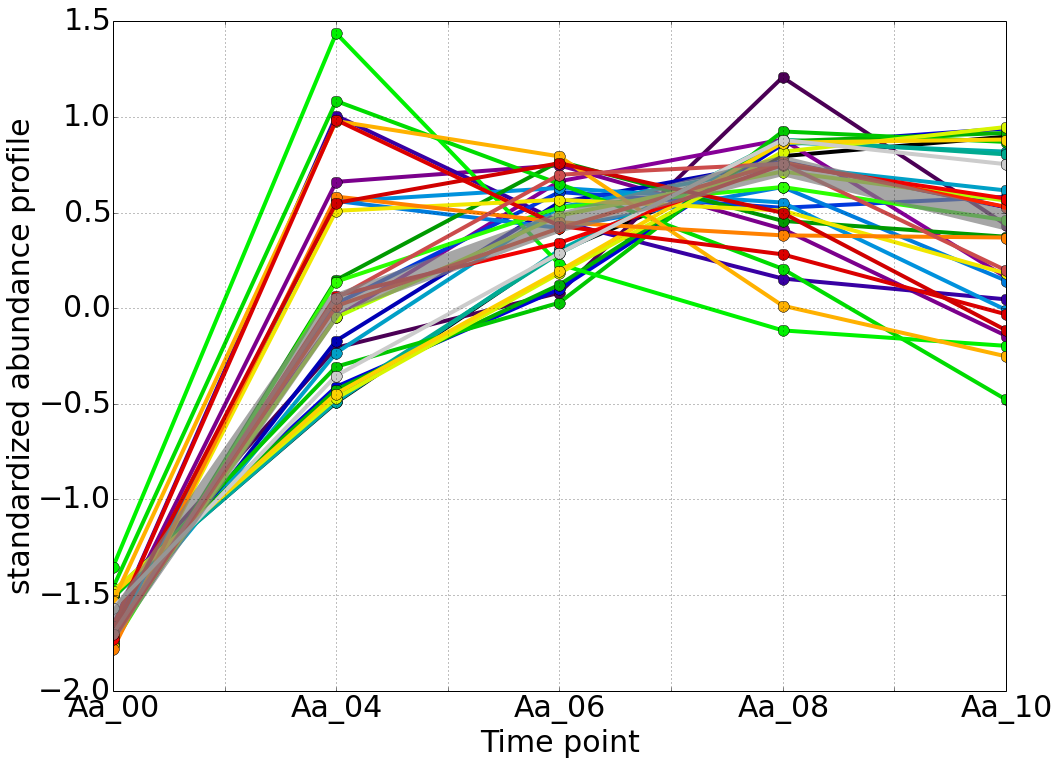

In [24]:
plot_abundance_profiles(AaFPKMs_AgOrthos_vb,draw_legend=0,cm='spectral',logy=0)
save_figure('Aa_%s_cls%s_Ag_target_FPKMs_vb_orthos.pdf' % (cluster_name,cluster_id))

saving figure as: /home/gus/Dropbox/repos/git/uci-thesis-latex/figures/figs/ecr_and_insects_ptci_20130918_orthodb7/upAfter4_gene_profiles_from_cummerbund/Ag_upAfter4_cls4_Ag_target_FPKMs_vb_orthos.pdf


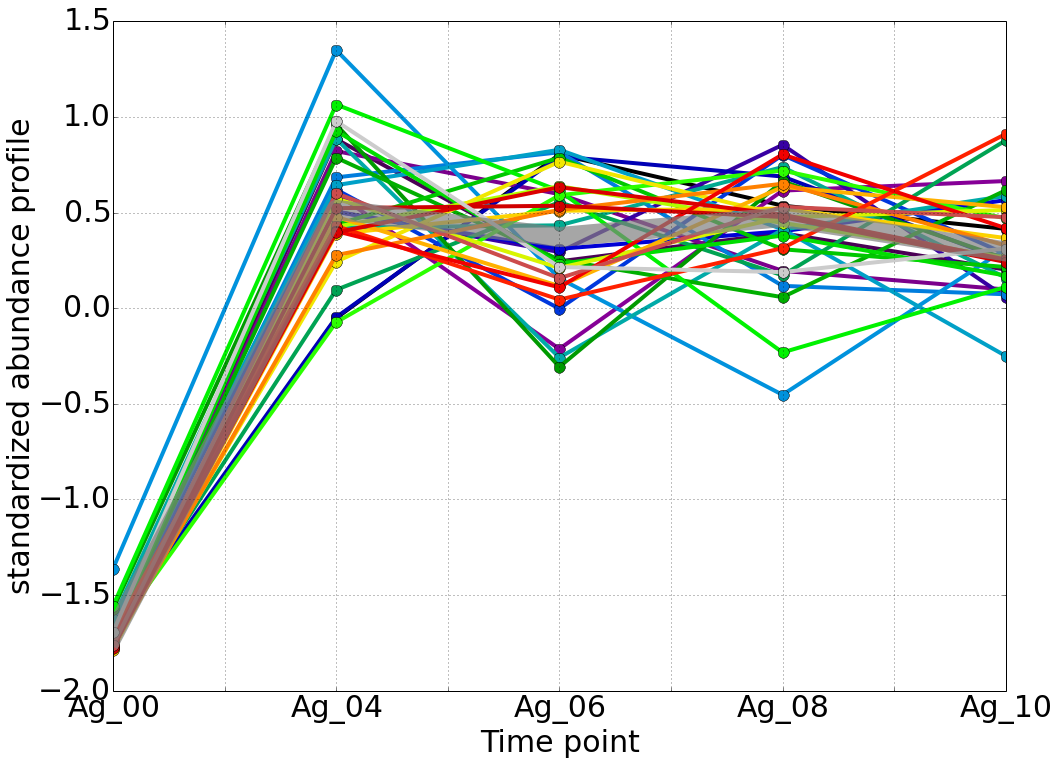

In [25]:
plot_abundance_profiles(AgFPKMs_AgOrthos_vb,draw_legend=0,cm='spectral',logy=0)
save_figure('Ag_%s_cls%s_Ag_target_FPKMs_vb_orthos.pdf' % (cluster_name,cluster_id))

saving figure as: /home/gus/Dropbox/repos/git/uci-thesis-latex/figures/figs/ecr_and_insects_ptci_20130918_orthodb7/upAfter4_gene_profiles_from_cummerbund/Cq_upAfter4_cls4_Ag_target_FPKMs_vb_orthos.pdf


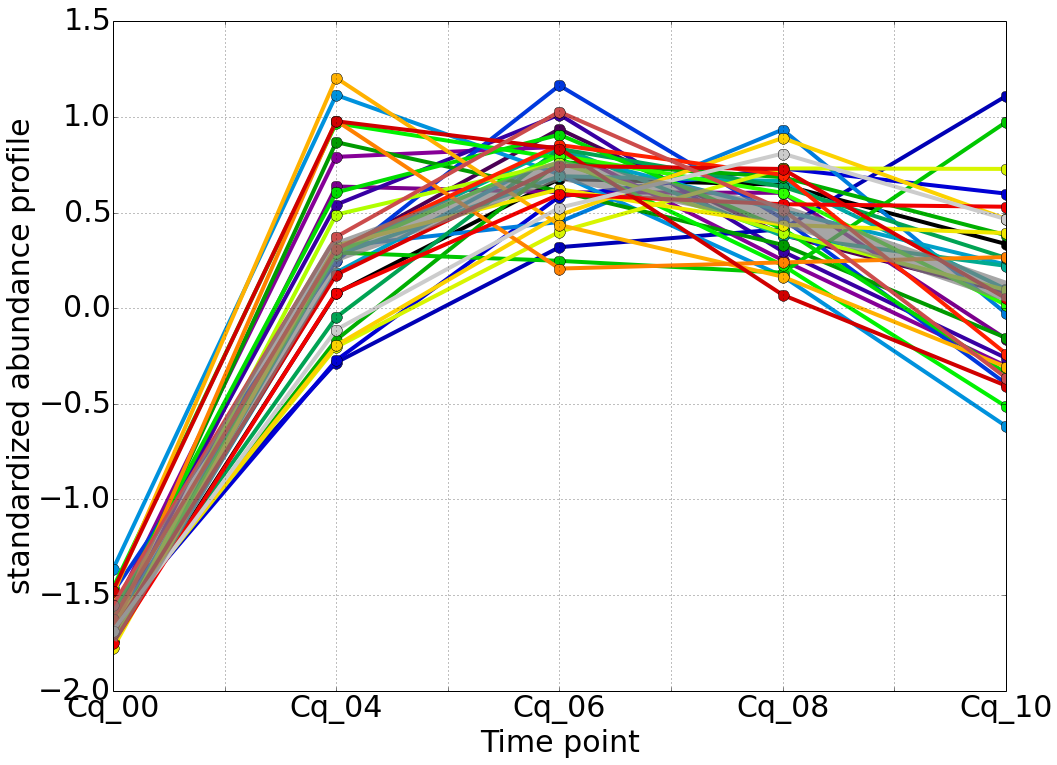

In [26]:
plot_abundance_profiles(CqFPKMs_AgOrthos_vb+1,draw_legend=0,cm='spectral',logy=0)
save_figure('Cq_%s_cls%s_Ag_target_FPKMs_vb_orthos.pdf' % (cluster_name,cluster_id))

# Load the Argot2 results that match the genes above

In [27]:
argot2 = pd.read_table('/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/all/argot2/ecr_OR_insect_meanPTCI_thresh_1_genes.PEPTIDES.blast_hmmer.argot2.tsv')

In [28]:
def get_argot_records_for_gene(df,gene_names,total_score=200):
    """
    """
    if type(gene_names) == type([]):
        gene_names = '|'.join(gene_names)
        
    gene_mask = df.Sequence.str.contains(gene_names)
    total_score_mask = df['Total Score'] >= total_score
    
    return df[gene_mask & total_score_mask]
    
    

In [29]:
argot_results = []


for i in range(len(Ag_target_FPKMs_vb_orthos.index)):
    argot_results.append(get_argot_records_for_gene(argot2,list(Ag_target_FPKMs_vb_orthos.ix[i]),150).sort('Total Score', ascending=False))

In [30]:
len(argot_results)

32

## Display Argot2 results

In [31]:
argot_results[0].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
5295,AAEL011025-RA,F,GO:0015078,hydrogen ion transmembrane transporter activity,6284.719228,0.789507,5.471423
4417,CPIJ009947-RA,F,GO:0015078,hydrogen ion transmembrane transporter activity,6276.763910,0.789407,5.471423
3549,AGAP000721-PA,F,GO:0015078,hydrogen ion transmembrane transporter activity,6275.124826,0.789375,5.471423
5302,AAEL011025-RA,C,GO:0033179,"proton-transporting V-type ATPase, V0 domain",3724.207442,0.267671,10.249382
4424,CPIJ009947-RA,C,GO:0033179,"proton-transporting V-type ATPase, V0 domain",3724.203733,0.267736,10.249382
3556,AGAP000721-PA,C,GO:0033179,"proton-transporting V-type ATPase, V0 domain",3721.766135,0.267878,10.249382
3546,AGAP000721-PA,P,GO:0015991,ATP hydrolysis coupled proton transport,1861.034892,0.206658,10.791978
4414,CPIJ009947-RA,P,GO:0015991,ATP hydrolysis coupled proton transport,1860.444365,0.206602,10.791978
5292,AAEL011025-RA,P,GO:0015991,ATP hydrolysis coupled proton transport,1859.492295,0.206588,10.791978
5290,AAEL011025-RA,P,GO:0015992,proton transport,1108.176007,0.385126,8.828616


In [32]:
argot_results[1].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
2488,AAEL011754-RA,P,GO:0016192,vesicle-mediated transport,259.677725,0.423345,9.504662
2237,AAEL011754-RB,P,GO:0016192,vesicle-mediated transport,259.677725,0.423345,9.504662
11868,CPIJ009435-RA,C,GO:0005783,endoplasmic reticulum,258.386213,0.308671,7.824706
11859,CPIJ009435-RA,P,GO:0016192,vesicle-mediated transport,257.638556,0.422117,9.504662
2494,AAEL011754-RA,C,GO:0005783,endoplasmic reticulum,243.944024,0.306153,7.824706
2243,AAEL011754-RB,C,GO:0005783,endoplasmic reticulum,243.944024,0.306153,7.824706
6504,AGAP000948-PA,P,GO:0016192,vesicle-mediated transport,216.634373,0.417766,9.504662
6515,AGAP000948-PA,C,GO:0016020,membrane,213.245202,0.591674,2.771484
6513,AGAP000948-PA,C,GO:0005783,endoplasmic reticulum,206.958704,0.299159,7.824706
2487,AAEL011754-RA,P,GO:0015031,protein transport,193.360131,0.248561,8.018848


In [33]:
argot_results[2].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
8862,CPIJ012308-RA,C,GO:0072546,ER membrane protein complex,572.246012,0.123065,12.619219
1711,AGAP001136-PA,C,GO:0072546,ER membrane protein complex,548.828874,0.126839,12.619219
8412,AAEL011813-RA,C,GO:0072546,ER membrane protein complex,526.995810,0.117989,12.619219
8860,CPIJ012308-RA,C,GO:0005737,cytoplasm,411.202011,0.604734,3.250628
1709,AGAP001136-PA,C,GO:0005737,cytoplasm,395.446958,0.615867,3.250628
8410,AAEL011813-RA,C,GO:0005737,cytoplasm,378.035412,0.593504,3.250628
8861,CPIJ012308-RA,C,GO:0005783,endoplasmic reticulum,362.037556,0.263025,7.824706
1710,AGAP001136-PA,C,GO:0005783,endoplasmic reticulum,347.446549,0.270279,7.824706
8411,AAEL011813-RA,C,GO:0005783,endoplasmic reticulum,336.955083,0.253967,7.824706
8858,CPIJ012308-RA,C,GO:0005634,nucleus,204.441403,0.158107,5.585100


In [34]:
argot_results[3].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
9638,AAEL012419-RA,P,GO:0043248,proteasome assembly,3326.436555,0.128280,15.514859
13017,AAEL012419-RB,P,GO:0043248,proteasome assembly,3326.436555,0.128280,15.514859
2651,CPIJ015971-RA,C,GO:0000502,proteasome complex,2779.175404,0.478474,8.510831
9644,AAEL012419-RA,C,GO:0000502,proteasome complex,2772.383740,0.477155,8.510831
13023,AAEL012419-RB,C,GO:0000502,proteasome complex,2772.383740,0.477155,8.510831
13758,AGAP001440-PB,C,GO:0000502,proteasome complex,2766.585097,0.476307,8.510831
3440,AGAP001440-PA,C,GO:0000502,proteasome complex,2766.585097,0.476307,8.510831
2644,CPIJ015971-RA,P,GO:0006511,ubiquitin-dependent protein catabolic process,2736.213359,0.172774,11.018613
13015,AAEL012419-RB,P,GO:0006511,ubiquitin-dependent protein catabolic process,2703.889827,0.172273,11.018613
9636,AAEL012419-RA,P,GO:0006511,ubiquitin-dependent protein catabolic process,2703.889827,0.172273,11.018613


In [35]:
argot_results[4].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
3820,AGAP001759-PA,P,GO:0006888,ER to Golgi vesicle-mediated transport,6362.819113,0.188292,12.734902
14024,AAEL007484-RB,P,GO:0006888,ER to Golgi vesicle-mediated transport,6349.267434,0.188385,12.734902
7069,AAEL007484-RA,P,GO:0006888,ER to Golgi vesicle-mediated transport,6341.848892,0.188389,12.734902
8436,CPIJ005333-RA,P,GO:0006888,ER to Golgi vesicle-mediated transport,6268.695937,0.188481,12.734902
3827,AGAP001759-PA,F,GO:0008270,zinc ion binding,5129.237552,0.508732,5.183802
14031,AAEL007484-RB,F,GO:0008270,zinc ion binding,5115.602772,0.509154,5.183802
7076,AAEL007484-RA,F,GO:0008270,zinc ion binding,5109.554842,0.509154,5.183802
8443,CPIJ005333-RA,F,GO:0008270,zinc ion binding,5049.442615,0.509970,5.183802
8453,CPIJ005333-RA,C,GO:0031410,cytoplasmic vesicle,1377.810063,0.290053,7.183019
14041,AAEL007484-RB,C,GO:0031410,cytoplasmic vesicle,1372.575012,0.289989,7.183019


In [36]:
argot_results[5].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
8648,CPIJ006975-RA,C,GO:0016471,vacuolar proton-transporting V-type ATPase com...,9388.642471,0.385675,11.318983
1111,AGAP001823-PA,C,GO:0016471,vacuolar proton-transporting V-type ATPase com...,9320.547525,0.390152,11.318983
2937,AAEL012819-RA,C,GO:0016471,vacuolar proton-transporting V-type ATPase com...,9315.516237,0.388815,11.318983
2935,AAEL012819-RA,F,GO:0016820,"hydrolase activity, acting on acid anhydrides,...",6758.799239,0.655488,5.402464
8646,CPIJ006975-RA,F,GO:0016820,"hydrolase activity, acting on acid anhydrides,...",6633.228603,0.636541,5.402464
1109,AGAP001823-PA,F,GO:0016820,"hydrolase activity, acting on acid anhydrides,...",6551.717131,0.652638,5.402464
1105,AGAP001823-PA,P,GO:0015992,proton transport,6389.216105,0.326691,8.828616
8643,CPIJ006975-RA,P,GO:0015992,proton transport,3467.605077,0.323030,8.828616
2932,AAEL012819-RA,P,GO:0015992,proton transport,3453.153064,0.323941,8.828616
1103,AGAP001823-PA,P,GO:0006811,ion transport,230.723103,0.514503,6.896230


In [37]:
argot_results[6].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
7177,AAEL006061-RA,C,GO:0005839,proteasome core complex,2056.706557,0.367372,9.214580
12777,AGAP001995-PA,C,GO:0005839,proteasome core complex,1989.711097,0.354080,9.214580
12264,CPIJ006946-RA,C,GO:0005839,proteasome core complex,1955.251872,0.353012,9.214580
7174,AAEL006061-RA,F,GO:0004298,threonine-type endopeptidase activity,1900.479635,0.214677,9.172162
12774,AGAP001995-PA,F,GO:0004298,threonine-type endopeptidase activity,1890.283114,0.213497,9.172162
7170,AAEL006061-RA,P,GO:0051603,proteolysis involved in cellular protein catab...,1879.216443,0.419659,10.313290
12261,CPIJ006946-RA,F,GO:0004298,threonine-type endopeptidase activity,1829.437479,0.207814,9.172162
12257,CPIJ006946-RA,P,GO:0051603,proteolysis involved in cellular protein catab...,1782.374533,0.404856,10.313290
12770,AGAP001995-PA,P,GO:0051603,proteolysis involved in cellular protein catab...,1758.792777,0.399816,10.313290
12266,CPIJ006946-RA,C,GO:0005737,cytoplasm,1564.685272,0.306152,3.250628


In [38]:
argot_results[7].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
8269,AAEL010060-RA,P,GO:0006614,SRP-dependent cotranslational protein targetin...,15982.878318,0.479933,11.641823
2308,CPIJ008397-RA,P,GO:0006614,SRP-dependent cotranslational protein targetin...,14849.820938,0.449320,11.641823
8272,AAEL010060-RA,F,GO:0005047,signal recognition particle binding,9701.480331,0.264904,12.217667
2311,CPIJ008397-RA,F,GO:0005047,signal recognition particle binding,9465.703037,0.258623,12.217667
7619,AGAP002183-PA,P,GO:0006614,SRP-dependent cotranslational protein targetin...,8931.900274,0.293594,11.641823
8271,AAEL010060-RA,F,GO:0030942,endoplasmic reticulum signal peptide binding,8408.979152,0.231924,12.241328
7625,AGAP002183-PA,F,GO:0005047,signal recognition particle binding,8306.469932,0.227731,12.217667
2310,CPIJ008397-RA,F,GO:0030942,endoplasmic reticulum signal peptide binding,8270.772381,0.227560,12.241328
8278,AAEL010060-RA,C,GO:0005786,"signal recognition particle, endoplasmic retic...",7697.981702,0.252829,10.150561
2317,CPIJ008397-RA,C,GO:0005786,"signal recognition particle, endoplasmic retic...",7653.965600,0.251448,10.150561


In [39]:
argot_results[8].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
13296,CPIJ018212-RA,F,GO:0042626,"ATPase activity, coupled to transmembrane move...",2719.212636,0.219151,5.517933
13287,CPIJ018212-RA,P,GO:0006200,ATP catabolic process,2692.237330,0.115259,8.324075
7746,AAEL008134-RA,F,GO:0042626,"ATPase activity, coupled to transmembrane move...",2672.573908,0.219071,5.517933
1162,AGAP002278-PA,F,GO:0042626,"ATPase activity, coupled to transmembrane move...",2644.594832,0.217097,5.517933
1153,AGAP002278-PA,P,GO:0006200,ATP catabolic process,2591.804244,0.114094,8.324075
13307,CPIJ018212-RA,C,GO:0016021,integral to membrane,1583.292629,0.252944,4.003541
7757,AAEL008134-RA,C,GO:0016021,integral to membrane,1574.964090,0.251634,4.003541
1173,AGAP002278-PA,C,GO:0016021,integral to membrane,1572.539677,0.251512,4.003541
13294,CPIJ018212-RA,F,GO:0016887,ATPase activity,1394.496479,0.346133,4.584823
13295,CPIJ018212-RA,F,GO:0017111,nucleoside-triphosphatase activity,1382.541657,0.471822,3.846231


In [40]:
argot_results[9].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
4324,AGAP002622-PA,F,GO:0005215,transporter activity,2430.601600,0.868397,2.471619
1663,AAEL010650-RA,F,GO:0005215,transporter activity,2382.146196,0.865652,2.471619
2336,CPIJ006087-RA,F,GO:0005215,transporter activity,2374.539852,0.865481,2.471619
2341,CPIJ006087-RA,C,GO:0016021,integral to membrane,1503.110733,0.348479,4.003541
1668,AAEL010650-RA,C,GO:0016021,integral to membrane,1497.152955,0.347808,4.003541
4326,AGAP002622-PA,F,GO:0015293,symporter activity,1479.832644,0.437805,5.897554
4329,AGAP002622-PA,C,GO:0016021,integral to membrane,1462.293958,0.344058,4.003541
2338,CPIJ006087-RA,F,GO:0015293,symporter activity,1416.356321,0.437473,5.897554
1665,AAEL010650-RA,F,GO:0015293,symporter activity,1395.145824,0.436128,5.897554
4322,AGAP002622-PA,P,GO:0055085,transmembrane transport,1264.273246,0.220546,7.456681


In [41]:
argot_results[10].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
3839,AGAP003077-PA,P,GO:0006508,proteolysis,5801.782659,0.283457,7.947992
10898,AGAP003077-PB,P,GO:0006508,proteolysis,5651.377763,0.284371,7.947992
3167,AAEL007201-RA,P,GO:0006508,proteolysis,5640.689208,0.284303,7.947992
10867,CPIJ011103-RA,P,GO:0006508,proteolysis,5635.776846,0.283705,7.947992
3172,AAEL007201-RA,F,GO:0004177,aminopeptidase activity,1596.580716,0.229512,7.614107
10872,CPIJ011103-RA,F,GO:0004177,aminopeptidase activity,1594.458484,0.229915,7.614107
10903,AGAP003077-PB,F,GO:0004177,aminopeptidase activity,1590.372957,0.229859,7.614107
3844,AGAP003077-PA,F,GO:0004177,aminopeptidase activity,1586.590228,0.229676,7.614107
3170,AAEL007201-RA,F,GO:0008270,zinc ion binding,1228.556388,0.147168,5.183802
10901,AGAP003077-PB,F,GO:0008270,zinc ion binding,1227.628951,0.147065,5.183802


In [42]:
argot_results[11].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
1294,AGAP003240-PA,C,GO:0005789,endoplasmic reticulum membrane,1216.102376,0.308527,8.882121
7115,CPIJ001349-RA,C,GO:0005789,endoplasmic reticulum membrane,1213.161167,0.312441,8.882121
11434,AAEL017064-RB,C,GO:0005789,endoplasmic reticulum membrane,1204.941110,0.312912,8.882121
2130,AAEL017064-RA,C,GO:0005789,endoplasmic reticulum membrane,1174.370901,0.312128,8.882121
7109,CPIJ001349-RA,P,GO:0001555,oocyte growth,553.336162,0.107227,17.649142
11428,AAEL017064-RB,P,GO:0001555,oocyte growth,548.156619,0.107213,17.649142
1287,AGAP003240-PA,P,GO:0001555,oocyte growth,537.771564,0.103481,17.649142
7114,CPIJ001349-RA,C,GO:0005783,endoplasmic reticulum,536.866024,0.533886,7.824706
2124,AAEL017064-RA,P,GO:0001555,oocyte growth,534.788894,0.106991,17.649142
11433,AAEL017064-RB,C,GO:0005783,endoplasmic reticulum,530.412816,0.534104,7.824706


In [43]:
argot_results[12].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
629,CPIJ008006-RA,P,GO:0006783,heme biosynthetic process,5080.635433,0.321798,10.807086
8456,AGAP003719-PA,P,GO:0006783,heme biosynthetic process,5065.002336,0.320870,10.807086
10762,AAEL005415-RA,P,GO:0006783,heme biosynthetic process,5061.723734,0.320812,10.807086
10764,AAEL005415-RA,F,GO:0004325,ferrochelatase activity,4994.638422,0.307457,9.431162
8458,AGAP003719-PA,F,GO:0004325,ferrochelatase activity,4988.373529,0.307059,9.431162
631,CPIJ008006-RA,F,GO:0004325,ferrochelatase activity,4987.344628,0.307180,9.431162
628,CPIJ008006-RA,P,GO:0006779,porphyrin-containing compound biosynthetic pro...,3088.143007,0.587600,9.634171
10761,AAEL005415-RA,P,GO:0006779,porphyrin-containing compound biosynthetic pro...,3073.546754,0.585666,9.634171
8455,AGAP003719-PA,P,GO:0006779,porphyrin-containing compound biosynthetic pro...,3069.678010,0.585520,9.634171
633,CPIJ008006-RA,C,GO:0005737,cytoplasm,2416.406806,0.783335,3.250628


In [44]:
argot_results[13].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
1311,AGAP004559-PA,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925
769,AGAP004559-PE,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925
2582,AGAP004559-PC,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925
6959,AGAP004559-PF,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925
10713,AGAP004559-PJ,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925
9196,AGAP004559-PB,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925
4781,AGAP004559-PK,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925
12661,AGAP004559-PH,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925
6049,AGAP004559-PI,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925
4183,AGAP004559-PD,F,GO:0005525,GTP binding,4107.066131,0.259149,5.988925


In [45]:
argot_results[14].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
14002,AGAP004586-PA,F,GO:0005525,GTP binding,3696.658938,0.235442,5.988925
6940,AGAP004586-PB,F,GO:0005525,GTP binding,3696.658938,0.235442,5.988925
10348,AAEL010423-RA,F,GO:0005525,GTP binding,3678.994324,0.233465,5.988925
9359,CPIJ011092-RA,F,GO:0005525,GTP binding,3647.216943,0.232507,5.988925
6936,AGAP004586-PB,P,GO:0007264,small GTPase mediated signal transduction,1454.832876,0.092980,9.092754
13998,AGAP004586-PA,P,GO:0007264,small GTPase mediated signal transduction,1454.832876,0.092980,9.092754
9355,CPIJ011092-RA,P,GO:0007264,small GTPase mediated signal transduction,1418.642317,0.091628,9.092754
10344,AAEL010423-RA,P,GO:0007264,small GTPase mediated signal transduction,1403.482728,0.091970,9.092754
10347,AAEL010423-RA,F,GO:0000166,nucleotide binding,1392.969763,0.473635,2.417616
14001,AGAP004586-PA,F,GO:0000166,nucleotide binding,1392.543195,0.476509,2.417616


In [46]:
argot_results[15].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
11471,AGAP004991-PA,C,GO:0005839,proteasome core complex,3256.280029,0.316256,9.214580
3135,AAEL008770-RA,C,GO:0005839,proteasome core complex,3027.506524,0.322570,9.214580
340,CPIJ003987-RA,C,GO:0005839,proteasome core complex,2981.711583,0.318127,9.214580
11465,AGAP004991-PA,P,GO:0051603,proteolysis involved in cellular protein catab...,2236.869073,0.295318,10.313290
3129,AAEL008770-RA,P,GO:0051603,proteolysis involved in cellular protein catab...,2225.699174,0.312840,10.313290
334,CPIJ003987-RA,P,GO:0051603,proteolysis involved in cellular protein catab...,2196.187993,0.311101,10.313290
11468,AGAP004991-PA,F,GO:0004298,threonine-type endopeptidase activity,1890.960496,0.204439,9.172162
11470,AGAP004991-PA,C,GO:0000502,proteasome complex,1884.943201,0.517640,8.510831
3132,AAEL008770-RA,F,GO:0004298,threonine-type endopeptidase activity,1854.547016,0.205195,9.172162
3134,AAEL008770-RA,C,GO:0000502,proteasome complex,1835.583153,0.525291,8.510831


In [47]:
argot_results[16].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
6144,AAEL004691-RA,F,GO:0008270,zinc ion binding,1714.531434,0.215498,5.183802
11492,AGAP005202-PB,F,GO:0008270,zinc ion binding,1714.366907,0.215503,5.183802
3194,AGAP005202-PA,F,GO:0008270,zinc ion binding,1714.366907,0.215503,5.183802
9880,CPIJ012886-RA,F,GO:0008270,zinc ion binding,1712.491435,0.215301,5.183802
3192,AGAP005202-PA,F,GO:0004842,ubiquitin-protein ligase activity,1263.499585,0.144580,8.700287
11490,AGAP005202-PB,F,GO:0004842,ubiquitin-protein ligase activity,1263.499585,0.144580,8.700287
6142,AAEL004691-RA,F,GO:0004842,ubiquitin-protein ligase activity,1260.244119,0.144289,8.700287
9878,CPIJ012886-RA,F,GO:0004842,ubiquitin-protein ligase activity,1259.991331,0.144320,8.700287
3186,AGAP005202-PA,P,GO:0016567,protein ubiquitination,1073.745705,0.182079,10.943550
11484,AGAP005202-PB,P,GO:0016567,protein ubiquitination,1073.745705,0.182079,10.943550


In [48]:
argot_results[17].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
7972,AGAP006613-PB,F,GO:0003743,translation initiation factor activity,19501.291116,0.821266,7.932099
4343,AAEL012279-RA,F,GO:0003743,translation initiation factor activity,18978.937213,0.799301,7.932099
5026,AGAP006613-PA,F,GO:0003743,translation initiation factor activity,18621.529510,0.784216,7.932099
4290,CPIJ004899-RA,F,GO:0003743,translation initiation factor activity,18082.917996,0.761534,7.932099
4284,CPIJ004899-RA,P,GO:0006446,regulation of translational initiation,7843.223631,0.222370,12.927147
4341,AAEL012279-RA,P,GO:0006413,translational initiation,7290.112588,0.689782,10.399049
7967,AGAP006613-PB,P,GO:0001731,formation of translation preinitiation complex,7288.942366,0.220556,13.235274
7968,AGAP006613-PB,P,GO:0006412,translation,4510.358076,0.915780,7.312497
4285,CPIJ004899-RA,P,GO:0006412,translation,4230.907382,0.896478,7.312497
5020,AGAP006613-PA,P,GO:0006412,translation,4156.633810,0.901981,7.312497


In [49]:
argot_results[18].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
7205,CPIJ008812-RA,C,GO:0016021,integral to membrane,887.790933,0.179782,4.003541
4138,AAEL001656-RA,C,GO:0016021,integral to membrane,887.316514,0.179152,4.003541
5256,AGAP007732-PA,C,GO:0016021,integral to membrane,886.332327,0.178885,4.003541
11274,AGAP007732-PB,C,GO:0016021,integral to membrane,885.970734,0.178930,4.003541
5234,AGAP007732-PA,P,GO:0055085,transmembrane transport,668.893900,0.145931,7.456681
11252,AGAP007732-PB,P,GO:0055085,transmembrane transport,667.508948,0.145818,7.456681
7183,CPIJ008812-RA,P,GO:0055085,transmembrane transport,666.980500,0.146164,7.456681
4116,AAEL001656-RA,P,GO:0055085,transmembrane transport,665.357441,0.145743,7.456681
5230,AGAP007732-PA,P,GO:0006810,transport,639.079713,0.632629,5.335029
11248,AGAP007732-PB,P,GO:0006810,transport,638.246257,0.632214,5.335029


In [50]:
argot_results[19].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
4813,AGAP008632-PA,C,GO:0005739,mitochondrion,3967.848401,0.450985,4.761080
4608,CPIJ000416-RA,C,GO:0005739,mitochondrion,3890.413355,0.457731,4.761080
9347,AAEL014734-RA,C,GO:0005739,mitochondrion,3854.041490,0.459365,4.761080
4606,CPIJ000416-RA,F,GO:0047131,"saccharopine dehydrogenase (NAD+, L-glutamate-...",3506.032879,0.176800,14.306783
9345,AAEL014734-RA,F,GO:0047131,"saccharopine dehydrogenase (NAD+, L-glutamate-...",3498.283613,0.176306,14.306783
4811,AGAP008632-PA,F,GO:0047131,"saccharopine dehydrogenase (NAD+, L-glutamate-...",3356.499220,0.169779,14.306783
4803,AGAP008632-PA,P,GO:0033512,L-lysine catabolic process to acetyl-CoA via s...,2475.889167,0.096737,17.591983
4605,CPIJ000416-RA,F,GO:0047130,"saccharopine dehydrogenase (NADP+, L-lysine-fo...",1919.301705,0.129483,14.601900
4812,AGAP008632-PA,C,GO:0005737,cytoplasm,1917.529279,0.713944,3.250628
9344,AAEL014734-RA,F,GO:0047130,"saccharopine dehydrogenase (NADP+, L-lysine-fo...",1915.478750,0.129135,14.601900


In [51]:
argot_results[20].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
1523,CPIJ009281-RA,P,GO:0006888,ER to Golgi vesicle-mediated transport,5514.773669,0.209653,12.734902
9070,AGAP008803-PA,P,GO:0006888,ER to Golgi vesicle-mediated transport,5501.842677,0.209683,12.734902
8573,AGAP008803-PC,P,GO:0006888,ER to Golgi vesicle-mediated transport,5493.227216,0.209633,12.734902
12859,AAEL004977-RA,P,GO:0006888,ER to Golgi vesicle-mediated transport,5479.892224,0.208822,12.734902
9077,AGAP008803-PA,F,GO:0008270,zinc ion binding,4857.936869,0.477451,5.183802
8580,AGAP008803-PC,F,GO:0008270,zinc ion binding,4842.606965,0.476084,5.183802
12866,AAEL004977-RA,F,GO:0008270,zinc ion binding,4786.306774,0.470609,5.183802
1530,CPIJ009281-RA,F,GO:0008270,zinc ion binding,4786.258211,0.473860,5.183802
9083,AGAP008803-PA,C,GO:0030127,COPII vesicle coat,1324.756040,0.144784,11.401104
8586,AGAP008803-PC,C,GO:0030127,COPII vesicle coat,1324.272334,0.144748,11.401104


In [52]:
argot_results[21].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
8712,AGAP008837-PA,C,GO:0005839,proteasome core complex,2485.694201,0.277936,9.214580
7309,AAEL002401-RA,C,GO:0005839,proteasome core complex,2462.470746,0.280426,9.214580
6652,CPIJ000894-RA,C,GO:0005839,proteasome core complex,2451.916005,0.280145,9.214580
6645,CPIJ000894-RA,P,GO:0051603,proteolysis involved in cellular protein catab...,2081.883872,0.278598,10.313290
7302,AAEL002401-RA,P,GO:0051603,proteolysis involved in cellular protein catab...,2074.828376,0.277689,10.313290
8705,AGAP008837-PA,P,GO:0051603,proteolysis involved in cellular protein catab...,2047.290212,0.271320,10.313290
6649,CPIJ000894-RA,F,GO:0004298,threonine-type endopeptidase activity,1829.341773,0.200436,9.172162
7306,AAEL002401-RA,F,GO:0004298,threonine-type endopeptidase activity,1828.739489,0.200391,9.172162
8709,AGAP008837-PA,F,GO:0004298,threonine-type endopeptidase activity,1826.682846,0.199764,9.172162
6651,CPIJ000894-RA,C,GO:0000502,proteasome complex,1820.633116,0.476154,8.510831


In [53]:
argot_results[22].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
9687,AGAP008988-PA,P,GO:0006542,glutamine biosynthetic process,7385.431720,0.268542,12.013092
4453,AAEL001887-RA,P,GO:0006542,glutamine biosynthetic process,7031.414493,0.253124,12.013092
9516,AAEL001887-RB,P,GO:0006542,glutamine biosynthetic process,7031.414493,0.253124,12.013092
1064,CPIJ010973-RA,P,GO:0006542,glutamine biosynthetic process,6776.767057,0.243710,12.013092
1071,CPIJ010973-RA,F,GO:0004356,glutamate-ammonia ligase activity,2939.409874,0.198978,8.990190
9523,AAEL001887-RB,F,GO:0004356,glutamate-ammonia ligase activity,2898.771079,0.197386,8.990190
4460,AAEL001887-RA,F,GO:0004356,glutamate-ammonia ligase activity,2898.771079,0.197386,8.990190
9693,AGAP008988-PA,F,GO:0004356,glutamate-ammonia ligase activity,2867.128413,0.196471,8.990190
9689,AGAP008988-PA,P,GO:0006807,nitrogen compound metabolic process,1963.353640,0.672119,2.708909
4455,AAEL001887-RA,P,GO:0006807,nitrogen compound metabolic process,1882.272849,0.660560,2.708909


In [54]:
argot_results[23].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
3164,CPIJ004203-RA,C,GO:0005839,proteasome core complex,3740.161058,0.298821,9.214580
9561,AGAP009271-PA,C,GO:0005839,proteasome core complex,3668.733158,0.301413,9.214580
5788,AAEL006441-RA,C,GO:0005839,proteasome core complex,3597.423660,0.300093,9.214580
3158,CPIJ004203-RA,P,GO:0051603,proteolysis involved in cellular protein catab...,2075.441690,0.239643,10.313290
9555,AGAP009271-PA,P,GO:0051603,proteolysis involved in cellular protein catab...,2053.942651,0.244408,10.313290
5782,AAEL006441-RA,P,GO:0051603,proteolysis involved in cellular protein catab...,2017.201617,0.245775,10.313290
3163,CPIJ004203-RA,C,GO:0000502,proteasome complex,1825.760110,0.500732,8.510831
3161,CPIJ004203-RA,F,GO:0004298,threonine-type endopeptidase activity,1824.962480,0.209993,9.172162
9558,AGAP009271-PA,F,GO:0004298,threonine-type endopeptidase activity,1813.591731,0.209167,9.172162
9560,AGAP009271-PA,C,GO:0000502,proteasome complex,1806.057381,0.504442,8.510831


In [55]:
argot_results[24].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
5690,AAEL010689-RA,P,GO:0007030,Golgi organization,7459.504880,0.338038,14.188936
1328,AGAP009765-PA,P,GO:0007030,Golgi organization,7241.017681,0.336409,14.188936
8370,CPIJ004214-RA,P,GO:0007030,Golgi organization,7168.817789,0.334253,14.188936
5691,AAEL010689-RA,P,GO:0060348,bone development,7004.292390,0.338038,13.323063
1329,AGAP009765-PA,P,GO:0060348,bone development,6799.138235,0.336409,13.323063
8371,CPIJ004214-RA,P,GO:0060348,bone development,6731.344306,0.334253,13.323063
5693,AAEL010689-RA,F,GO:0019899,enzyme binding,3789.012113,0.377848,8.199043
1331,AGAP009765-PA,F,GO:0019899,enzyme binding,3675.845121,0.376640,8.199043
8373,CPIJ004214-RA,F,GO:0019899,enzyme binding,3627.776792,0.372416,8.199043
5694,AAEL010689-RA,C,GO:0005794,Golgi apparatus,3489.708027,0.315352,7.913438


In [56]:
argot_results[25].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
3087,AGAP009840-PA,F,GO:0008565,protein transporter activity,14303.112594,0.688979,6.919955
12638,CPIJ011956-RA,F,GO:0008565,protein transporter activity,13932.730443,0.671138,6.919955
8929,AAEL004756-RA,F,GO:0008565,protein transporter activity,12753.449877,0.615297,6.919955
3082,AGAP009840-PA,P,GO:0048280,vesicle fusion with Golgi apparatus,3104.482301,0.129608,15.579552
12639,CPIJ011956-RA,C,GO:0000139,Golgi membrane,3014.402540,0.204430,9.282048
3088,AGAP009840-PA,C,GO:0000139,Golgi membrane,3008.675779,0.204388,9.282048
8927,AAEL004756-RA,P,GO:0006886,intracellular protein transport,2982.871871,0.177977,9.110494
8930,AAEL004756-RA,C,GO:0000139,Golgi membrane,2957.138734,0.201465,9.282048
8923,AAEL004756-RA,P,GO:0048193,Golgi vesicle transport,2170.501734,0.284715,11.976762
12637,CPIJ011956-RA,P,GO:0006944,cellular membrane fusion,1838.254523,0.183901,12.950624


In [57]:
argot_results[26].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
2684,AGAP010025-PA,F,GO:0005093,Rab GDP-dissociation inhibitor activity,7383.421854,0.415959,12.216292
6290,AAEL012904-RA,F,GO:0005093,Rab GDP-dissociation inhibitor activity,7351.488941,0.414969,12.216292
730,CPIJ015309-RA,F,GO:0005093,Rab GDP-dissociation inhibitor activity,7349.218583,0.414638,12.216292
2675,AGAP010025-PA,P,GO:0015031,protein transport,3855.464753,0.290850,8.018848
6281,AAEL012904-RA,P,GO:0015031,protein transport,3835.367860,0.290666,8.018848
721,CPIJ015309-RA,P,GO:0015031,protein transport,3834.970482,0.290404,8.018848
2682,AGAP010025-PA,P,GO:0043547,positive regulation of GTPase activity,3556.684092,0.256121,11.520861
728,CPIJ015309-RA,P,GO:0043547,positive regulation of GTPase activity,3540.857263,0.256131,11.520861
6288,AAEL012904-RA,P,GO:0043547,positive regulation of GTPase activity,3533.612051,0.256300,11.520861
2687,AGAP010025-PA,C,GO:0005737,cytoplasm,2006.828071,0.533122,3.250628


In [58]:
argot_results[27].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
8303,CPIJ013967-RA,P,GO:0010506,regulation of autophagy,2390.296011,0.166061,13.824772
7495,AAEL007763-RB,P,GO:0010506,regulation of autophagy,2373.990064,0.165372,13.824772
6476,AGAP010304-PA,P,GO:0010506,regulation of autophagy,2362.404480,0.164373,13.824772
11098,AGAP010304-PB,P,GO:0010506,regulation of autophagy,2362.404480,0.164373,13.824772
1051,AAEL007763-RA,P,GO:0010506,regulation of autophagy,1984.125674,0.138225,13.824772
8305,CPIJ013967-RA,P,GO:0016337,cell-cell adhesion,1841.113200,0.151357,11.466814
7497,AAEL007763-RB,P,GO:0016337,cell-cell adhesion,1837.949065,0.150832,11.466814
6478,AGAP010304-PA,P,GO:0016337,cell-cell adhesion,1824.458851,0.149882,11.466814
11100,AGAP010304-PB,P,GO:0016337,cell-cell adhesion,1824.458851,0.149882,11.466814
1053,AAEL007763-RA,P,GO:0016337,cell-cell adhesion,1546.455644,0.126714,11.466814


In [59]:
argot_results[28].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
2698,CPIJ002831-RA,P,GO:0006810,transport,2397.672733,0.718903,5.335029
1768,AGAP010383-PA,P,GO:0006810,transport,2333.166011,0.711493,5.335029
6169,AAEL003318-RA,P,GO:0006810,transport,2257.258163,0.696086,5.335029
2704,CPIJ002831-RA,F,GO:0005215,transporter activity,1750.419475,0.820120,2.471619
1774,AGAP010383-PA,F,GO:0005215,transporter activity,1690.465521,0.805422,2.471619
6175,AAEL003318-RA,F,GO:0005215,transporter activity,1640.518829,0.795418,2.471619
1786,AGAP010383-PA,C,GO:0016021,integral to membrane,1442.053933,0.417729,4.003541
2716,CPIJ002831-RA,C,GO:0016021,integral to membrane,1437.194090,0.419294,4.003541
6187,AAEL003318-RA,C,GO:0016021,integral to membrane,1422.028600,0.413305,4.003541
2699,CPIJ002831-RA,P,GO:0006857,oligopeptide transport,1290.224871,0.190739,11.932436


In [60]:
argot_results[29].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
11881,AAEL003508-RA,F,GO:0030170,pyridoxal phosphate binding,2619.683068,0.146211,6.200926
1144,AAEL003508-RB,F,GO:0030170,pyridoxal phosphate binding,2619.683068,0.146211,6.200926
9546,AGAP010387-PC,F,GO:0030170,pyridoxal phosphate binding,2574.610303,0.144045,6.200926
11311,AGAP010387-PA,F,GO:0030170,pyridoxal phosphate binding,2574.610303,0.144045,6.200926
1400,CPIJ002835-RA,F,GO:0030170,pyridoxal phosphate binding,2542.653716,0.142740,6.200926
11314,AGAP010387-PA,C,GO:0005777,peroxisome,2090.894561,0.417638,9.528245
9549,AGAP010387-PC,C,GO:0005777,peroxisome,2090.894561,0.417638,9.528245
1147,AAEL003508-RB,C,GO:0005777,peroxisome,2060.718175,0.420929,9.528245
11884,AAEL003508-RA,C,GO:0005777,peroxisome,2060.718175,0.420929,9.528245
1403,CPIJ002835-RA,C,GO:0005777,peroxisome,1987.996507,0.408282,9.528245


In [61]:
argot_results[30].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
1971,AAEL013230-RA,C,GO:0030131,clathrin adaptor complex,3483.678109,0.116886,10.497398
1959,AAEL013230-RA,P,GO:0016192,vesicle-mediated transport,3446.975209,0.390838,9.504662
8669,AGAP010719-PA,C,GO:0030131,clathrin adaptor complex,3428.272270,0.115068,10.497398
8656,AGAP010719-PA,P,GO:0006890,"retrograde vesicle-mediated transport, Golgi t...",3037.874375,0.164772,14.332463
1962,AAEL013230-RA,F,GO:0005515,protein binding,2364.851099,0.317764,5.214180
2449,CPIJ017540-RA,C,GO:0030131,clathrin adaptor complex,1998.870795,0.118801,10.497398
1955,AAEL013230-RA,P,GO:0006890,"retrograde vesicle-mediated transport, Golgi t...",1828.103211,0.168351,14.332463
8655,AGAP010719-PA,P,GO:0006886,intracellular protein transport,1758.082639,0.160283,9.110494
8660,AGAP010719-PA,F,GO:0005515,protein binding,1748.440955,0.251580,5.214180
2435,CPIJ017540-RA,P,GO:0006890,"retrograde vesicle-mediated transport, Golgi t...",1741.668711,0.166980,14.332463


In [62]:
argot_results[31].head(60)

,Sequence,Aspect,GO ID,Name,Total Score,Internal Confidence,Information Content
1834,CPIJ008264-RA,C,GO:0005839,proteasome core complex,3047.688101,0.314713,9.214580
9322,AAEL003431-RA,C,GO:0005839,proteasome core complex,3009.594700,0.319011,9.214580
143,AGAP011423-PA,C,GO:0005839,proteasome core complex,3009.138903,0.317240,9.214580
1833,CPIJ008264-RA,C,GO:0000502,proteasome complex,1979.260567,0.531095,8.510831
9321,AAEL003431-RA,C,GO:0000502,proteasome complex,1967.239605,0.535638,8.510831
142,AGAP011423-PA,C,GO:0000502,proteasome complex,1967.121398,0.533648,8.510831
9319,AAEL003431-RA,F,GO:0004298,threonine-type endopeptidase activity,1849.356170,0.212209,9.172162
140,AGAP011423-PA,F,GO:0004298,threonine-type endopeptidase activity,1843.238421,0.211664,9.172162
1831,CPIJ008264-RA,F,GO:0004298,threonine-type endopeptidase activity,1842.981741,0.211572,9.172162
9316,AAEL003431-RA,P,GO:0051603,proteolysis involved in cellular protein catab...,1736.385574,0.264988,10.313290


# Save Argot tables

In [70]:
arc = pd.concat(argot_results)

In [71]:
arcg = arc.groupby(['Aspect','Name']).mean()

In [72]:
arcgP = arcg.T.P.copy()
arcgC = arcg.T.C.copy()
arcgF = arcg.T.F.copy()

In [73]:
arcgP = arcgP.T.sort(columns=['Total Score','Internal Confidence','Information Content'], ascending=[0,0,0], inplace=0)
arcgC = arcgC.T.sort(columns=['Total Score','Internal Confidence','Information Content'], ascending=[0,0,0], inplace=0)
arcgF = arcgF.T.sort(columns=['Total Score','Internal Confidence','Information Content'], ascending=[0,0,0], inplace=0)

In [77]:
arcgP.head(60)

,Total Score,Internal Confidence,Information Content
Name,,,
SRP-dependent cotranslational protein targeting to membrane,13254.866510,0.407615,11.641823
Golgi organization,7289.780117,0.336233,14.188936
glutamine biosynthetic process,7056.256941,0.254625,12.013092
bone development,6844.924977,0.336233,13.323063
ER to Golgi vesicle-mediated transport,5914.045895,0.198917,12.734902
heme biosynthetic process,5069.120501,0.321160,10.807086
regulation of translational initiation,4594.461449,0.224800,12.927147
formation of translation preinitiation complex,4524.894583,0.217712,13.235274
translational initiation,4288.819512,0.682315,10.399049


In [78]:
arcgF.head(60)

,Total Score,Internal Confidence,Information Content
Name,,,
translation initiation factor activity,18796.168959,0.791579,7.932099
protein transporter activity,13663.097638,0.658471,6.919955
signal recognition particle binding,9157.884433,0.250420,12.217667
endoplasmic reticulum signal peptide binding,7943.196523,0.219159,12.241328
Rab GDP-dissociation inhibitor activity,7361.376459,0.415189,12.216292
"hydrolase activity, acting on acid anhydrides, catalyzing transmembrane movement of substances",6647.914991,0.648222,5.402464
hydrogen ion transmembrane transporter activity,6278.869321,0.789430,5.471423
ferrochelatase activity,4990.118860,0.307232,9.431162
GTP binding,4006.060406,0.253273,5.988925


In [76]:
arcgP.to_csv('/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/clusters/cls4/pandas_out/process.csv')
arcgF.to_csv('/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/clusters/cls4/pandas_out/function.csv')
arcgC.to_csv('/home/gus/Dropbox/common/projects/Aa_Ag_Cq_As/gfunc_stuff/prelim_gene_analysis/ecr_OR_insect_20130918_orthodb7/ptci_0_95/clusters/cls4/pandas_out/cellular.csv')